In [1]:
from tensorflow.keras.callbacks import Callback

# Personal imports
from load_monk import splitted_monk_data
from build_rbf_fixed import build_rbf_model
from plotting_monk import plot_history

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.4776 - loss: 0.5199 - mse: 0.5199 - val_accuracy: 0.6000 - val_loss: 0.3352 - val_mse: 0.3352
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4943 - loss: 0.4518 - mse: 0.4518 - val_accuracy: 0.6000 - val_loss: 0.2965 - val_mse: 0.2965
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4776 - loss: 0.4189 - mse: 0.4189 - val_accuracy: 0.6000 - val_loss: 0.2685 - val_mse: 0.2685
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4832 - loss: 0.3756 - mse: 0.3756 - val_accuracy: 0.6400 - val_loss: 0.2510 - val_mse: 0.2510
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4978 - loss: 0.3466 - mse: 0.3466 - val_accuracy: 0.6400 - val_loss: 0.2434 - val_mse: 0.2434
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5513 - loss: 0.3111 - mse: 0.3111 - val_accuracy: 0.6400 - val_loss: 0.2447 - val_mse: 0.2447
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step -

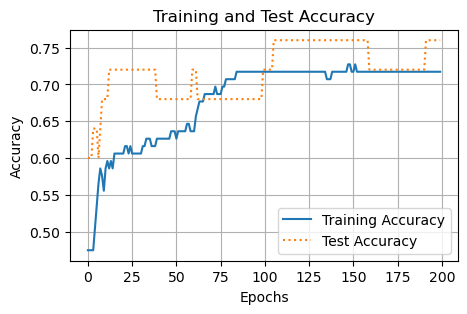

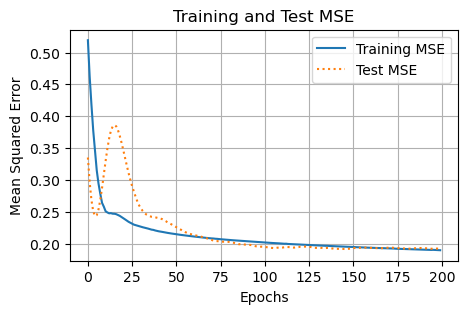

Training Accuracy: 0.7272727489471436
Validation Accuracy: 0.7599999904632568
Training MSE: 0.18964071571826935
Validation MSE: 0.19157275557518005


In [77]:
X_train, y_train, X_val, y_val, X_test, y_test = splitted_monk_data("monks-1")

# Custom callback to track test metrics at each epoch
class TestMetricsCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_accuracy = []
        self.test_mse = []

    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc, test_mse = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_accuracy.append(test_acc)
        self.test_mse.append(test_mse)

# Parametri fissi
input_dim = 6
output_dim = 1

n_centers = 100
gamma = 0.2
learning_rate = 0.01
batch_size = 60


# Creazione del modello
rbf_model = build_rbf_model(input_dim, output_dim, n_centers, gamma, learning_rate)

# Instantiate the callback
test_metrics_callback = TestMetricsCallback((X_test, y_test))

# Addestramento del modello
history = rbf_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=[test_metrics_callback]
)

plot_history(history)


n_centers = 150
gamma = 0.2
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8787878751754761

n_centers = 180
gamma = 0.2
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8989899158477783

n_centers = 200
gamma = 0.2
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8585858345031738

------

n_centers = 180
gamma = 0.15
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8888888955116272

n_centers = 180
gamma = 0.1
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.868686854839325

n_centers = 180
gamma = 0.25
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.868686854839325

------
n_centers = 160
gamma = 0.15
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8888888955116272

n_centers = 160
gamma = 0.11
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8787878751754761

n_centers = 160
gamma = 0.23
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8989899158477783

------

n_centers = 200
gamma = 0.15
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.9090909361839294

n_centers = 200
gamma = 0.11
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8585858345031738

n_centers = 200
gamma = 0.25
learning_rate = 0.6
batch_size = 50
Training Accuracy: 0.8888888955116272


n_centers = 160
gamma = 0.18
learning_rate = 0.7
batch_size = 70
Training Accuracy: 0.9191918969154358